In [5]:
import transit_model as tm
import numpy as np
import matplotlib.pyplot as plt
import random

In [6]:
g, passengers = tm.initialize(n_passengers=100, node_capacity=1000)

In [7]:
len(g.nodes)

140

since there are 140 nodes, we expect crowding effects to happen when `n_passengers/140 >=  node_capacity`

In [ ]:
n_passengers = 1000
node_cap_range = [50, 48, 45]
replicates = 2
max_steps = 1e5

print(n_passengers/len(g.nodes))

capacity_dict = {}

for n in node_cap_range:
    transit_times = []
    print(f'running simulations for node_capacity = {n}')
    for r in range(replicates):
        print(r)
        g, passengers = tm.initialize(n_passengers=n_passengers,
                                      node_capacity=n)
        temp_transit_times = tm.update(g=g,
                                       passengers=passengers,
                                       max_run_steps=max_steps)
        if len(temp_transit_times) == n_passengers:
            transit_times.extend(temp_transit_times)
        else:
            print(f'simulation with capacity of {n} is has only {len(temp_transit_times)}/{n_passengers} completed')
    capacity_dict[n] = transit_times

7.142857142857143
running simulations for node_capacity = 50
0
1
running simulations for node_capacity = 48
0
1
running simulations for node_capacity = 45
0


In [ ]:
for key in capacity_dict:
    plt.figure(dpi=120)
    transit_times = capacity_dict[key]
    plt.title(key)
    plt.hist(transit_times, alpha=0.8)
    plt.show()

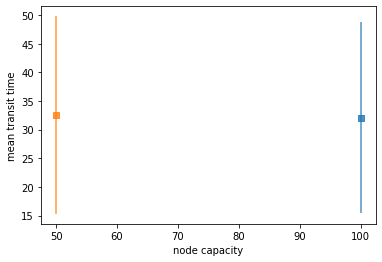

In [6]:
plt.figure()
for key in capacity_dict:
    transit_times = capacity_dict[key]
#     plt.scatter([key]*len(transit_times), transit_times, alpha=0.5)
    plt.errorbar(x=key, y=np.mean(transit_times), yerr=np.std(transit_times), fmt='s', alpha=0.8)

plt.xlabel('node capacity')
plt.ylabel('mean transit time')
plt.show()